In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
import time


# **Data Preparation**

In [2]:
data=pd.read_csv("C:\\Users\\PC\\Downloads\\WildFires_DataSet.csv")

In [3]:
print(data)

          NDVI           LST  BURNED_AREA    CLASS
0     0.506782  14584.272727     4.692308  no_fire
1     0.522150  14655.833333     5.000000  no_fire
2     0.682284  14780.000000     5.000000     fire
3     0.120046  13298.500000     3.500000  no_fire
4     0.568734  14743.000000     5.000000  no_fire
...        ...           ...          ...      ...
1708  0.621721  14406.000000     5.000000  no_fire
1709  0.709715  14330.400000     4.851852  no_fire
1710  0.613000  14751.500000     3.000000     fire
1711  0.614471  13611.000000     4.921053  no_fire
1712  0.549497  14269.777778     5.000000     fire

[1713 rows x 4 columns]


In [4]:
data.head
target=data["CLASS"]
features = list(data.select_dtypes(include = np.number).columns)
data=data.drop(columns="CLASS")
features

['NDVI', 'LST', 'BURNED_AREA']

In [5]:
target.value_counts()

CLASS
no_fire    1327
fire        386
Name: count, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
target= encoder.fit_transform(target)
target=pd.DataFrame(target)
target


,0
0,1
1,1
2,0
3,1
4,1
...,...
1708,1
1709,1
1710,0
1711,1


In [7]:
ros = RandomOverSampler(random_state=0)
ros.fit(data, target)
data, target = ros.fit_resample(data, target)
data

,NDVI,LST,BURNED_AREA
0,0.506782,14584.272727,4.692308
1,0.522150,14655.833333,5.000000
2,0.682284,14780.000000,5.000000
3,0.120046,13298.500000,3.500000
4,0.568734,14743.000000,5.000000
...,...,...,...
2649,0.476217,15157.210117,4.895536
2650,0.614250,14636.500000,4.000000
2651,0.587680,14845.914894,5.896175
2652,0.472933,14929.750000,4.000000


In [8]:
scaler= StandardScaler()
scaler.fit(data)
scaler=StandardScaler().set_output(transform="pandas")
data=scaler.fit_transform(data)
data

,NDVI,LST,BURNED_AREA
0,-0.473277,-0.303001,-0.027840
1,-0.296757,-0.100494,0.460112
2,1.542573,0.250881,0.460112
3,-4.915402,-3.941566,-1.918654
4,0.238316,0.146176,0.460112
...,...,...,...
2649,-0.824352,1.318335,0.294448
2650,0.761122,-0.155205,-1.125732
2651,0.455933,0.437411,1.881305
2652,-0.862073,0.674653,-1.125732


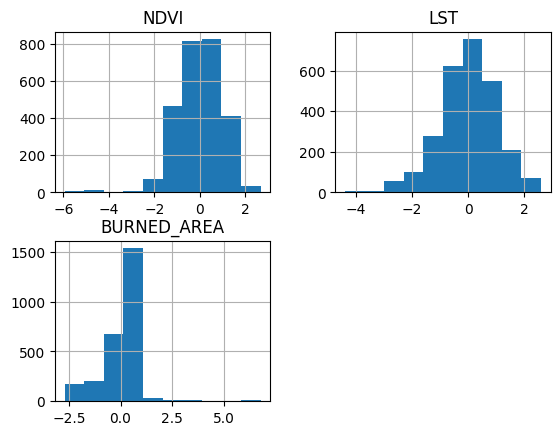

In [9]:
datahis=data.hist()


<function matplotlib.pyplot.show(close=None, block=None)>

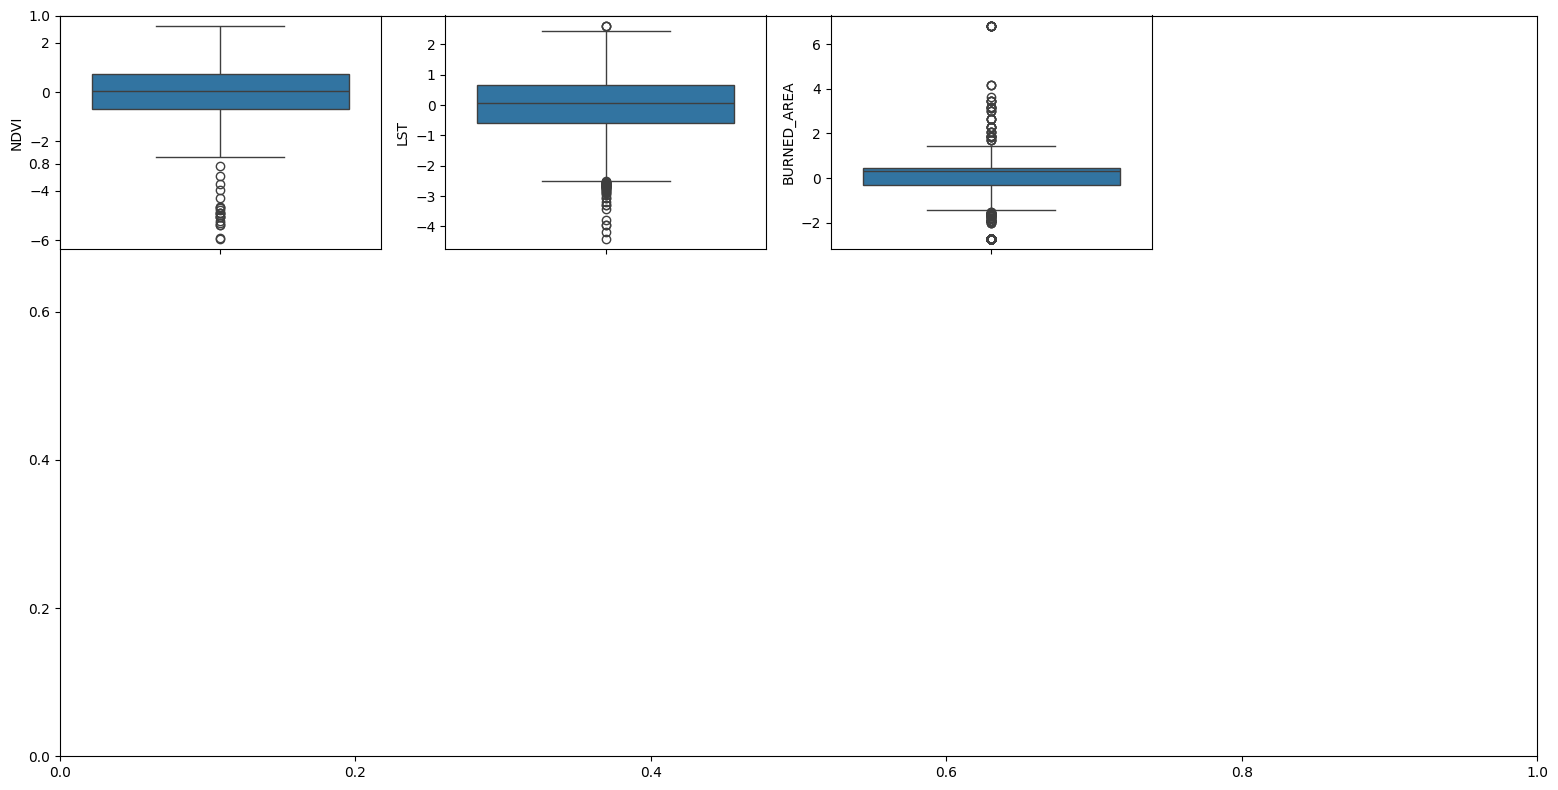

In [10]:
#BEFORE
plt.subplots(figsize=(16,8))
for i, col in enumerate(data.columns):
  plt.subplot(3,4,i+1)
  sb.boxplot(data[col])
plt.tight_layout()
plt.show

In [11]:
def remove_outliers(data, column_with_outliers, target):
    lower_limit = -2
    higher_limit = 2
    outliers_index = data[(data[column_with_outliers] < lower_limit) | (data[column_with_outliers] > higher_limit)].index
    data = data.drop(outliers_index)
    target = target.drop(outliers_index)
    return data, target

data, target = remove_outliers(data, "NDVI", target)
data, target = remove_outliers(data, "LST", target)
data, target = remove_outliers(data, "BURNED_AREA", target)


In [12]:
data

,NDVI,LST,BURNED_AREA
0,-0.473277,-0.303001,-0.027840
1,-0.296757,-0.100494,0.460112
2,1.542573,0.250881,0.460112
4,0.238316,0.146176,0.460112
5,-1.076922,0.674148,0.309079
...,...,...,...
2649,-0.824352,1.318335,0.294448
2650,0.761122,-0.155205,-1.125732
2651,0.455933,0.437411,1.881305
2652,-0.862073,0.674653,-1.125732


In [13]:
target

,0
0,1
1,1
2,0
4,1
5,0
...,...
2649,0
2650,0
2651,0
2652,0


In [14]:
target.value_counts()

0
0    1171
1    1107
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

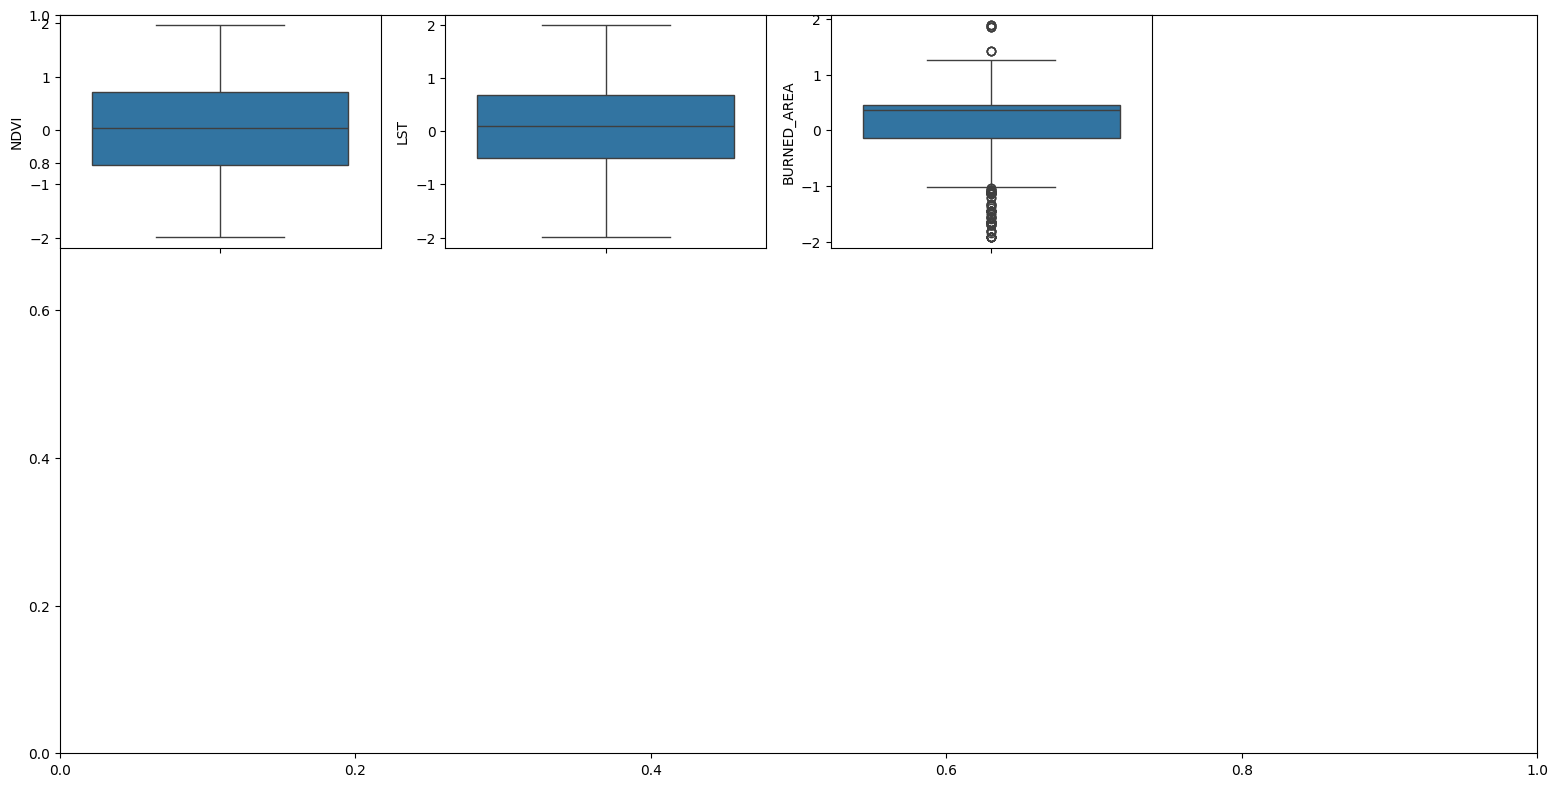

In [15]:
#AFTER
plt.subplots(figsize=(16,8))
for i, col in enumerate(data.columns):
  plt.subplot(3,4,i+1)
  sb.boxplot(data[col])
plt.tight_layout()
plt.show

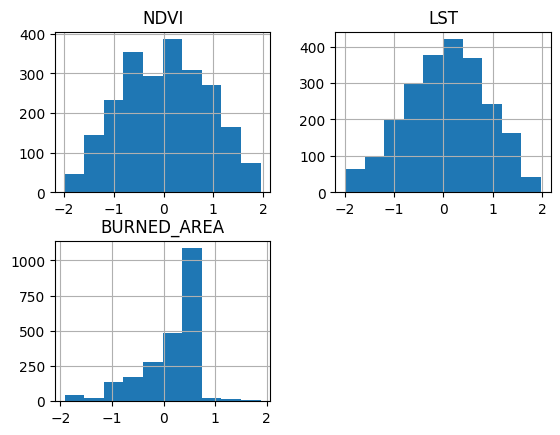

In [16]:
datahis=data.hist()

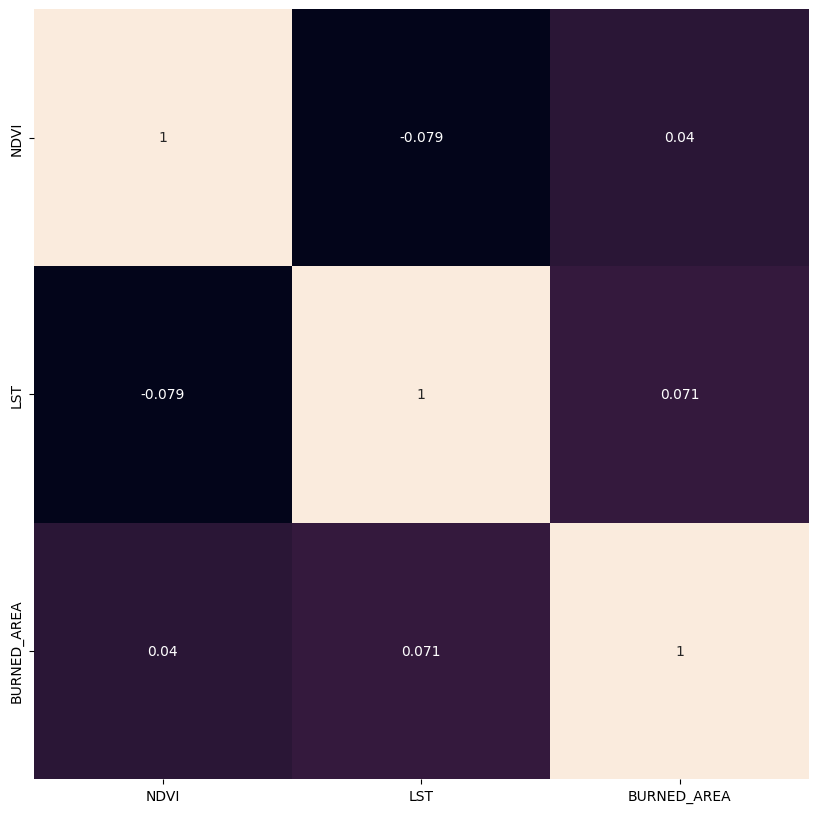

In [17]:
df=data.corr(method='pearson')
plt.figure(figsize=(10,10))
sb.heatmap(df,
		annot=True,
		cbar=False)
plt.show()




array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

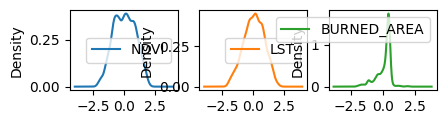

In [18]:
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False)


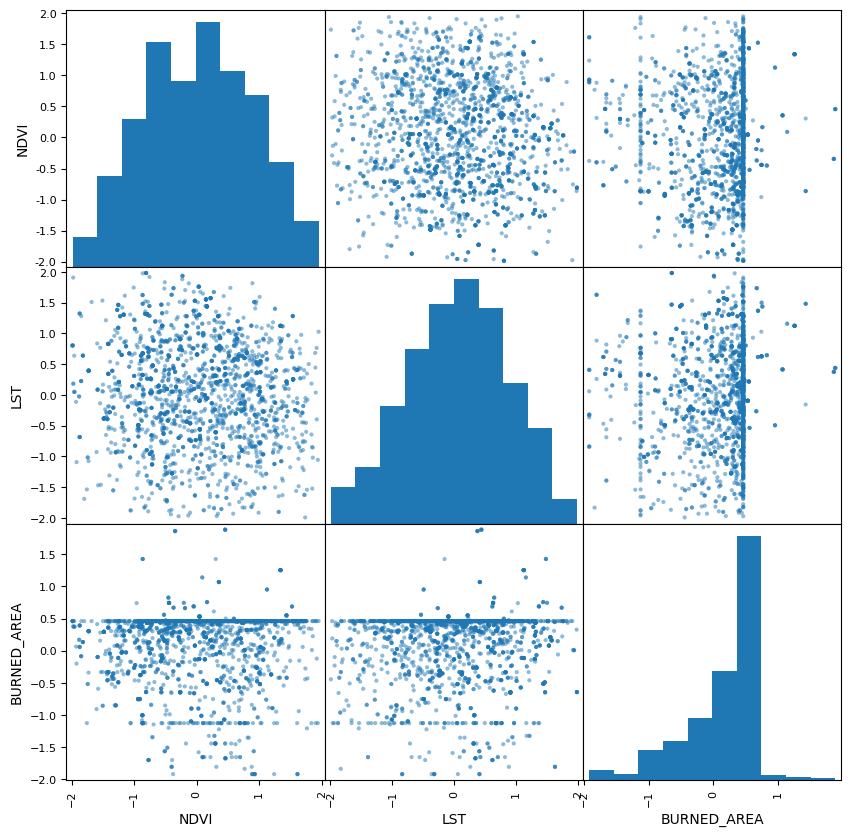

In [19]:
import pandas.plotting as pd_plotting

pd_plotting.scatter_matrix(data, figsize=(10, 10))
plt.show()

# **Functions**



1.   **Train The Model**



In [20]:
datatrain, datatest, targettrain, targettest = train_test_split(data, target, test_size=0.3, random_state=3)
def train_the_model (model) :
    t0=time.time()
    model.fit(datatrain, targettrain)
    traintime=time.time()-t0
    print ("the traintime is equal to ",traintime)
    return traintime,model



2.   **CrossValidate**




In [21]:
%%time
def crossvalidate(model):
  cv = ShuffleSplit(n_splits=30, test_size=0.3, random_state=0)
  cv_results = cross_validate(model , data, target, cv=cv, scoring="neg_mean_absolute_error",return_train_score=True,n_jobs=2)
  cv_results=pd.DataFrame(cv_results)
  cv_results["test_error"]=-cv_results["test_score"]
  cv_results["train_error"]=-cv_results["train_score"]
  cv_results
  return cv_results

CPU times: total: 0 ns
Wall time: 0 ns


3. **Class Distribution**

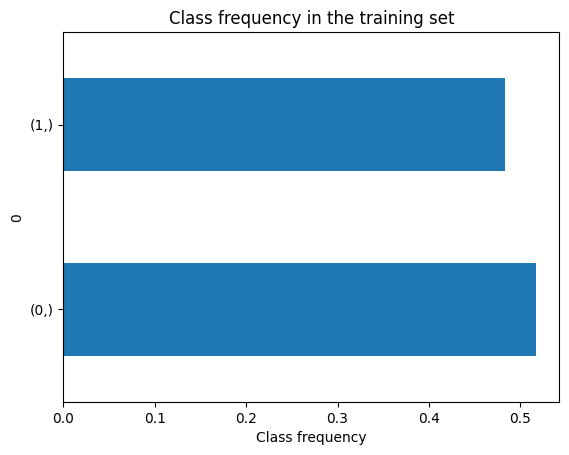

In [22]:
def get_the_class_distribution (targettrain):
    targettrain.value_counts(normalize=True).plot.barh()
    plt.xlabel("Class frequency")
    _ = plt.title("Class frequency in the training set")
    return
get_the_class_distribution(targettrain)

4. **Check the Score**

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score,precision_score,recall_score
def  get_the_score_of_the_model (model):
    target1=model.predict(datatest)
    target2=model.predict(datatrain)
    accuracy=accuracy_score(targettest,target1)
    trainerror=mean_absolute_error(target2,targettrain)
    testerror=mean_absolute_error(target1,targettest)
    print("the trainerror is equal to " ,trainerror)
    print("the test error is equal to" ,testerror)
    print("the accuracy of the model is equal to ", accuracy)
    precision=precision_score(targettest,target1)
    recall=recall_score(targettest,target1)
    print("the precision is equal to " ,precision)
    print("the recall is equal to" ,recall)
    return 



5. **Get The Confusion Matrix**

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
def get_the_confusion_matrix_of(model):
    model.fit(datatrain,targettrain)
    matricedeconfusion = ConfusionMatrixDisplay.from_estimator(model, datatest, targettest)
    return matricedeconfusion

6. **Get Precision-Recall and ROC curves**

In [25]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.dummy import DummyClassifier
from sklearn.metrics import RocCurveDisplay,precision_recall_curve,precision_score,recall_score,roc_auc_score,roc_curve
dummyclassifier = DummyClassifier(strategy="stratified")
dummyclassifier.fit(datatrain,targettrain)
def get_the_PRCURVE_and_the_ROC (model):
    fig,axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 7))
    PrecisionRecallDisplay.from_estimator(model , datatest , targettest , pos_label=1 , marker="+" , ax=axs[0])
    PrecisionRecallDisplay.from_estimator( dummyclassifier , datatest , targettest, pos_label=1 , color="tab:green" , linestyle="--" , ax=axs[0])
    axs[0].set_xlabel("Recall ")
    axs[0].set_ylabel("Precision")
    axs[0].set_xlim(0, 1)
    axs[0].set_ylim(0, 1)
    axs[0].legend( loc="lower left")
    precisionrecall= axs[0].set_title("Precision-recall curve")


    RocCurveDisplay.from_estimator(model , datatest , targettest , pos_label=1 , marker="+", ax=axs[1])
    RocCurveDisplay.from_estimator(dummyclassifier, datatest , targettest , pos_label=1 , color="tab:green" , linestyle="--",ax=axs[1])
    axs[1].set_xlabel("False positive rate")
    axs[1].set_ylabel("True positive rate")
    axs[1].set_xlim(0, 1)
    axs[1].set_ylim(0, 1)
    axs[1].legend( loc="lower right")
    ROC= axs[1].set_title("ROC")


    return 

7. **Get the Valdation Curve**

In [26]:
import scipy
from scipy.interpolate import interp1d
from sklearn.model_selection import validation_curve
def validationcurve (model1,hyperparam):
  train_score,test_score =validation_curve(model1,data,target,param_name=hyperparam,param_range=paramrange,cv=5,scoring="accuracy")
  trainscore = np.mean(train_score, axis=1)
  testscore = np.mean(test_score, axis=1)
  trainscore_std=np.std(train_score,axis=1)
  testscore_std=np.std(test_score,axis=1)
  trainerror=interp1d(paramrange,trainscore,kind='cubic')
  testerror=interp1d(paramrange,testscore,kind='cubic')
  plt.plot(paramrange,trainerror(paramrange),label="train score",color ="blue")
  plt.fill_between(paramrange,trainerror(paramrange)-trainscore_std,trainerror(paramrange)+ trainscore_std,alpha=0.2,color ="green")
  plt.plot(paramrange,testerror(paramrange),label="test score",color ="black")
  plt.fill_between(paramrange,testerror(paramrange)-testscore_std,testerror(paramrange)+testscore_std,alpha=0.2,color ="yellow")
  plt.xlabel('Value of the hyperamater '+hyperparam)
  plt.ylabel('Score')
  plt.title('Validation Curve')
  plt.legend(loc="best")
  plt.show()
  return

# **LOGISTIC REGRESSION**
---



In [27]:
model1=LogisticRegression(random_state=0)
train_the_model(model1)

the traintime is equal to  0.008584022521972656


C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.008584022521972656, LogisticRegression(random_state=0))

In [28]:
get_the_score_of_the_model(model1)

the trainerror is equal to  0.3619824341279799
the test error is equal to 0.358187134502924
the accuracy of the model is equal to  0.6418128654970761
the precision is equal to  0.636094674556213
the recall is equal to 0.6379821958456974


C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


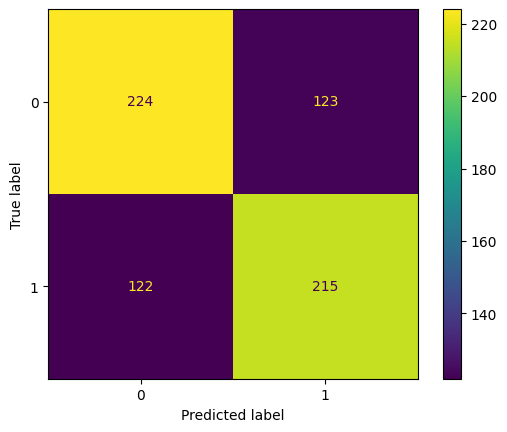

In [29]:
get_the_confusion_matrix_of(model1)

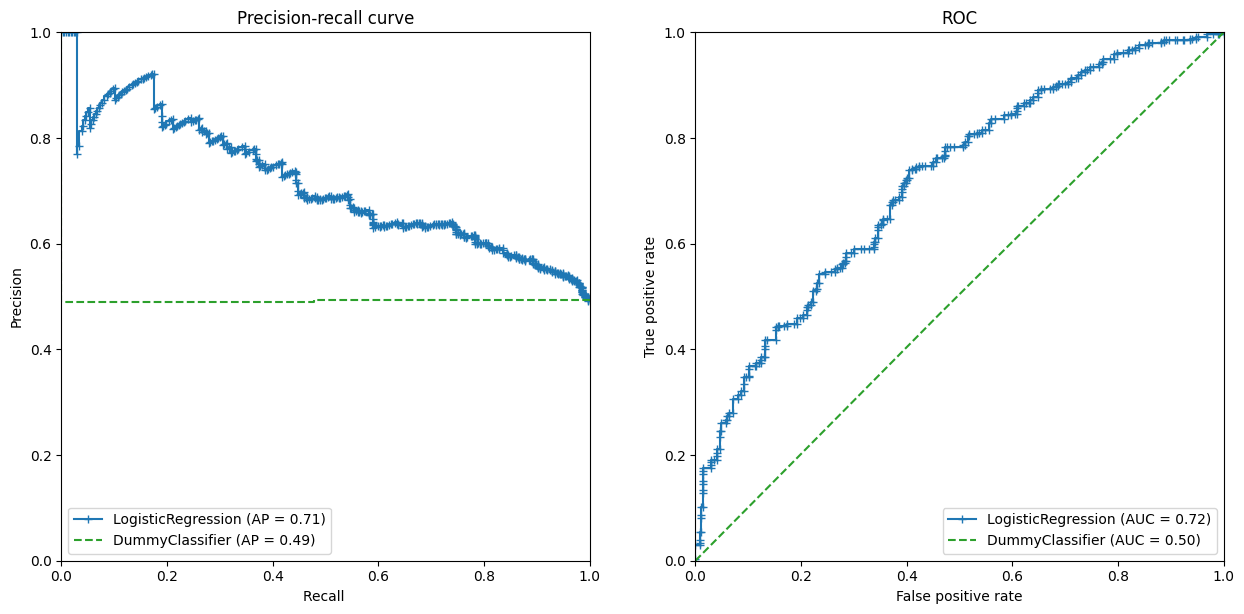

In [30]:
get_the_PRCURVE_and_the_ROC (model1)



In [31]:
for p in model1.get_params().items():
  print (p , type(p))

('C', 1.0) <class 'tuple'>
('class_weight', None) <class 'tuple'>
('dual', False) <class 'tuple'>
('fit_intercept', True) <class 'tuple'>
('intercept_scaling', 1) <class 'tuple'>
('l1_ratio', None) <class 'tuple'>
('max_iter', 100) <class 'tuple'>
('multi_class', 'auto') <class 'tuple'>
('n_jobs', None) <class 'tuple'>
('penalty', 'l2') <class 'tuple'>
('random_state', 0) <class 'tuple'>
('solver', 'lbfgs') <class 'tuple'>
('tol', 0.0001) <class 'tuple'>
('verbose', 0) <class 'tuple'>
('warm_start', False) <class 'tuple'>


In [32]:
crossval=crossvalidate(model1)
crossval.mean()


fit_time       0.003648
score_time     0.000996
test_score    -0.368519
train_score   -0.357298
test_error     0.368519
train_error    0.357298
dtype: float64

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y t

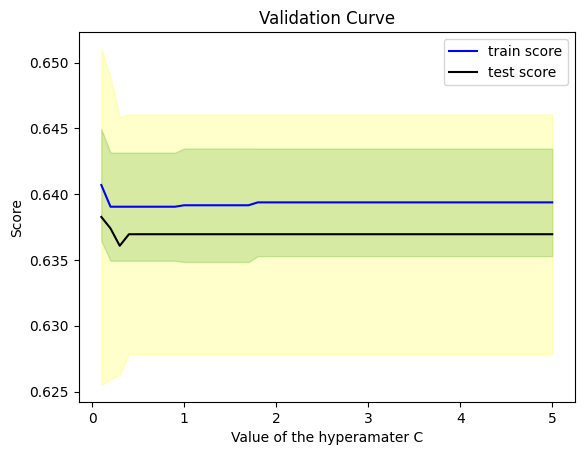

In [33]:
paramrange=np.linspace(0.1,5,50)
validationcurve(model1,'C')



In [75]:
import optuna

def objective(trial):

    LogisticRegression_c = trial.suggest_float('LogisticRegression_c', 1e-20, 1, log=False)
    classifier_obj = LogisticRegression(C=LogisticRegression_c)
    classifier_obj.fit(datatrain, targettrain)
    accuracy1 = classifier_obj.score(datatest, targettest)  
    
    return accuracy1 
sampler = optuna.samplers.TPESampler(seed=42)

study = optuna.create_study(sampler=sampler,direction='maximize')
study.optimize(objective, n_trials=80)
print("Best trial:", study.best_trial.number)
print("Best accuracy:", study.best_trial.value)
print("Best hyperparameters:", study.best_params)

[I 2024-03-26 14:43:22,768] A new study created in memory with name: no-name-bb4916ef-a821-4620-af24-c3127518b9c5
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[I 2024-03-26 14:43:22,781] Trial 0 finished with value: 0.6447368421052632 and parameters: {'LogisticRegression_c': 0.3745401188473625}. Best is trial 0 with value: 0.6447368421052632.
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

[I 2024-03-26 14:43:22,790] Trial 1 finished

Best trial: 11
Best accuracy: 0.6505847953216374
Best hyperparameters: {'LogisticRegression_c': 0.0030712505113303368}


C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


the traintime is equal to  0.009066343307495117
the trainerror is equal to  0.3594730238393977
the test error is equal to 0.34941520467836257
the accuracy of the model is equal to  0.6505847953216374
the precision is equal to  0.657051282051282
the recall is equal to 0.6083086053412463


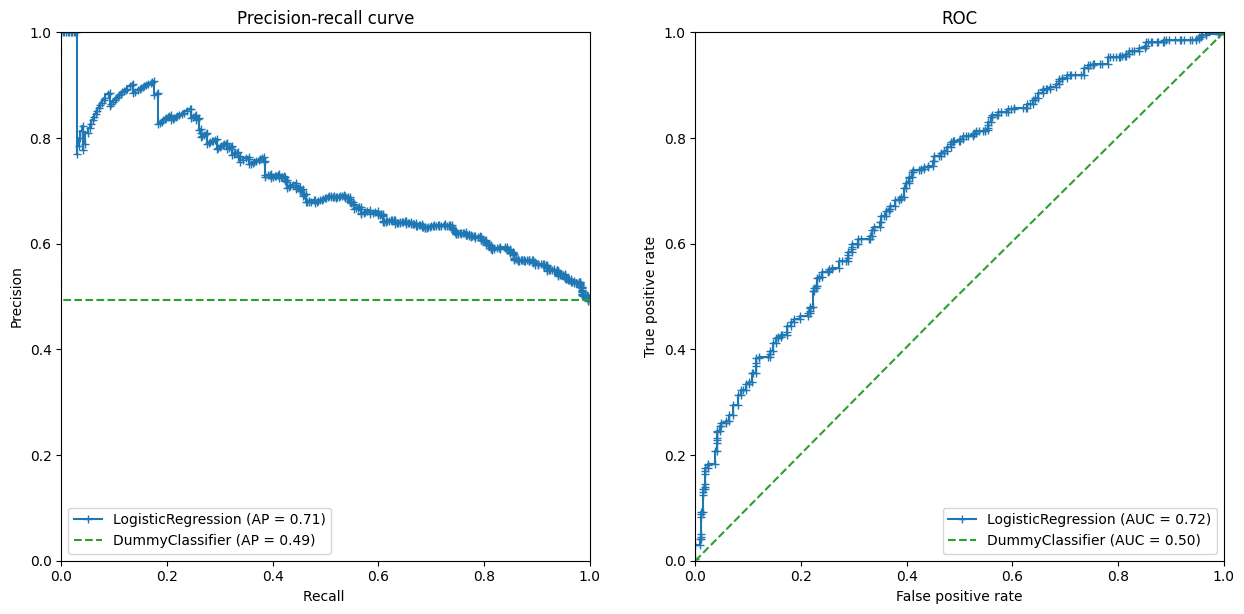

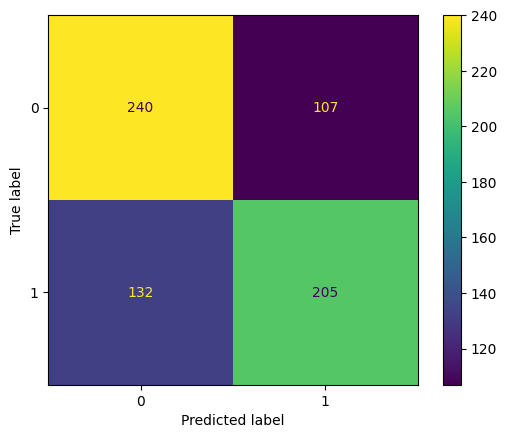

In [35]:
model1tuned=LogisticRegression().set_params(C=0.0030712505113303368)
train_the_model(model1tuned)
get_the_score_of_the_model(model1tuned)
get_the_PRCURVE_and_the_ROC(model1tuned)
get_the_confusion_matrix_of(model1tuned)

Text(0.5, 1.0, 'Precision-Recall Curve')

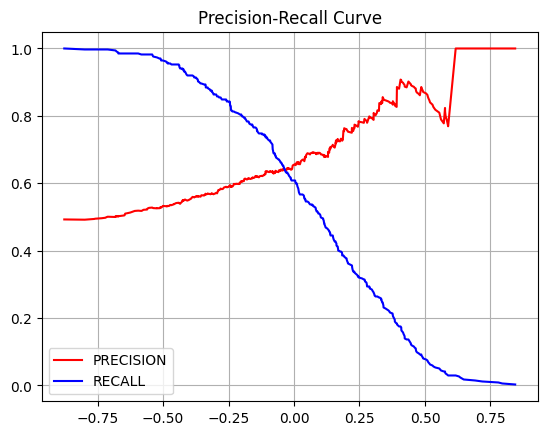

In [36]:
from sklearn.metrics import classification_report
decision_function = model1tuned.decision_function(datatest) 
target1 = model1tuned.predict(datatest)        
accuracy_actual = model1tuned.score(datatest, targettest) 
classification_report_actual = classification_report(targettest, target1)
precision, recall, threshold = precision_recall_curve(targettest, decision_function)  
plt.plot(threshold, precision[:-1], c ='r', label ='PRECISION') 
plt.plot(threshold, recall[:-1], c ='b', label ='RECALL') 
plt.grid() 
plt.legend() 
plt.title('Precision-Recall Curve')


In [37]:
df = model1tuned.decision_function(datatest) 
decision_teshold = 0.1
desired_predict =[] 
for i in df: 
    if i<decision_teshold: 
        desired_predict.append(0) 
    else: 
        desired_predict.append(1) 
print("old precision value:", precision_score(targettest, target1))  
print("new precision value:", precision_score(targettest, desired_predict))


old precision value: 0.657051282051282
new precision value: 0.6882591093117408


# **SVM**

In [38]:
model2=SVC(kernel="rbf")
train_the_model(model2)

the traintime is equal to  0.05467414855957031


C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.05467414855957031, SVC())

In [39]:
print(get_the_score_of_the_model(model2))


the trainerror is equal to  0.32559598494353825
the test error is equal to 0.3333333333333333
the accuracy of the model is equal to  0.6666666666666666
the precision is equal to  0.6860068259385665
the recall is equal to 0.5964391691394659
None


In [40]:
crossvalidate(model2).mean()

fit_time       0.052894
score_time     0.066343
test_score    -0.345419
train_score   -0.322898
test_error     0.345419
train_error    0.322898
dtype: float64

In [41]:
for p in model2.get_params().items():
    print (p)


('C', 1.0)
('break_ties', False)
('cache_size', 200)
('class_weight', None)
('coef0', 0.0)
('decision_function_shape', 'ovr')
('degree', 3)
('gamma', 'scale')
('kernel', 'rbf')
('max_iter', -1)
('probability', False)
('random_state', None)
('shrinking', True)
('tol', 0.001)
('verbose', False)


In [50]:
import sklearn
import optuna
def objective(trial):
    C = trial.suggest_float('c', 2, 9 ,log=True)
    kernel=trial.suggest_categorical('kernel',["linear","poly","rbf","sigmoid"])
    classifier_obj = SVC(C=C,kernel='rbf',gamma=10)
    classifier_obj.fit(datatrain, targettrain)
    accuracy_score = classifier_obj.score(datatest, targettest)  

    return accuracy_score  
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(sampler=sampler,direction='maximize')
study.optimize(objective, n_trials=40)
print("Best trial:", study.best_trial.number)
print("Best accuracy:", study.best_trial.value)
print("Best hyperparameters:", study.best_params)

[I 2024-03-26 13:45:48,929] A new study created in memory with name: no-name-b0aef70f-45ed-4954-b07e-20efbf8abe1f
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[I 2024-03-26 13:45:49,064] Trial 0 finished with value: 0.7807017543859649 and parameters: {'c': 3.5130496538674287, 'kernel': 'linear'}. Best is trial 0 with value: 0.7807017543859649.
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_o

Best trial: 14
Best accuracy: 0.7865497076023392
Best hyperparameters: {'c': 5.683379299647504, 'kernel': 'sigmoid'}


In [43]:
model2tuned=SVC().set_params(C=5.683379299647504,kernel='rbf',gamma=10)
train_the_model(model2tuned)
get_the_score_of_the_model(model2tuned)

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


the traintime is equal to  0.05505681037902832
the trainerror is equal to  0.09786700125470514
the test error is equal to 0.2134502923976608
the accuracy of the model is equal to  0.7865497076023392
the precision is equal to  0.823728813559322
the recall is equal to 0.7210682492581603


C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


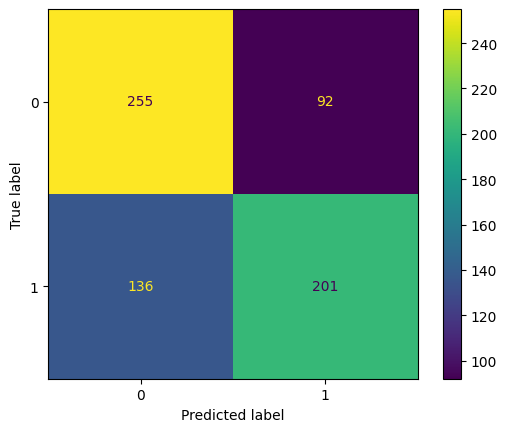

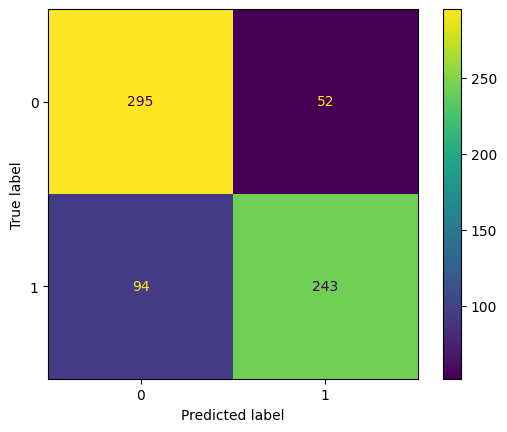

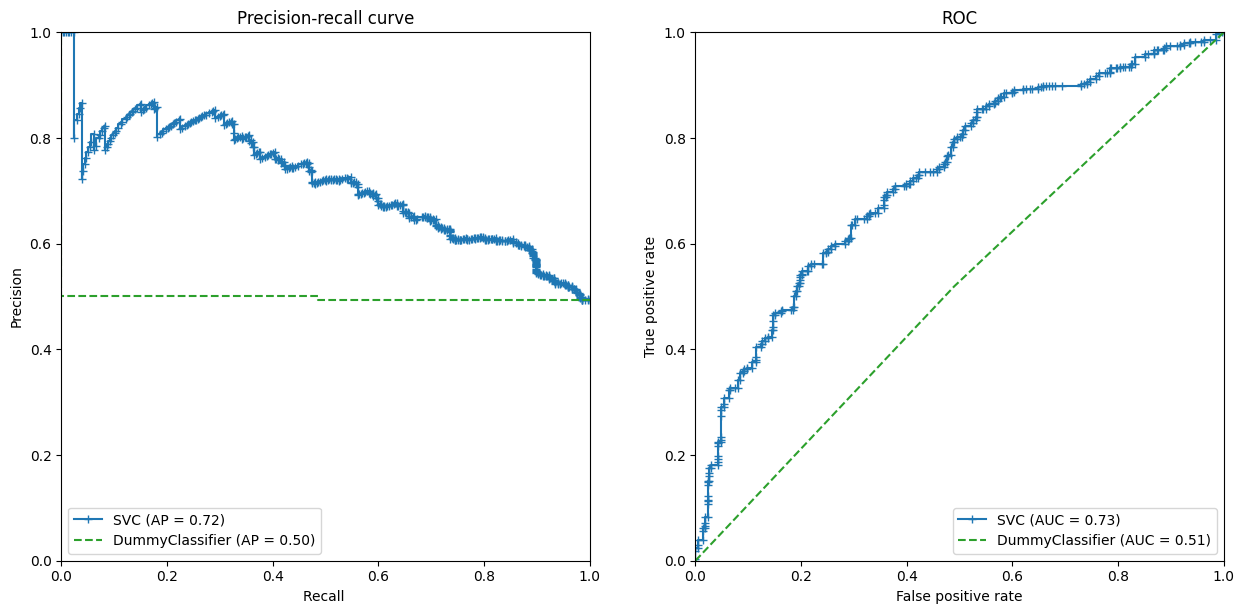

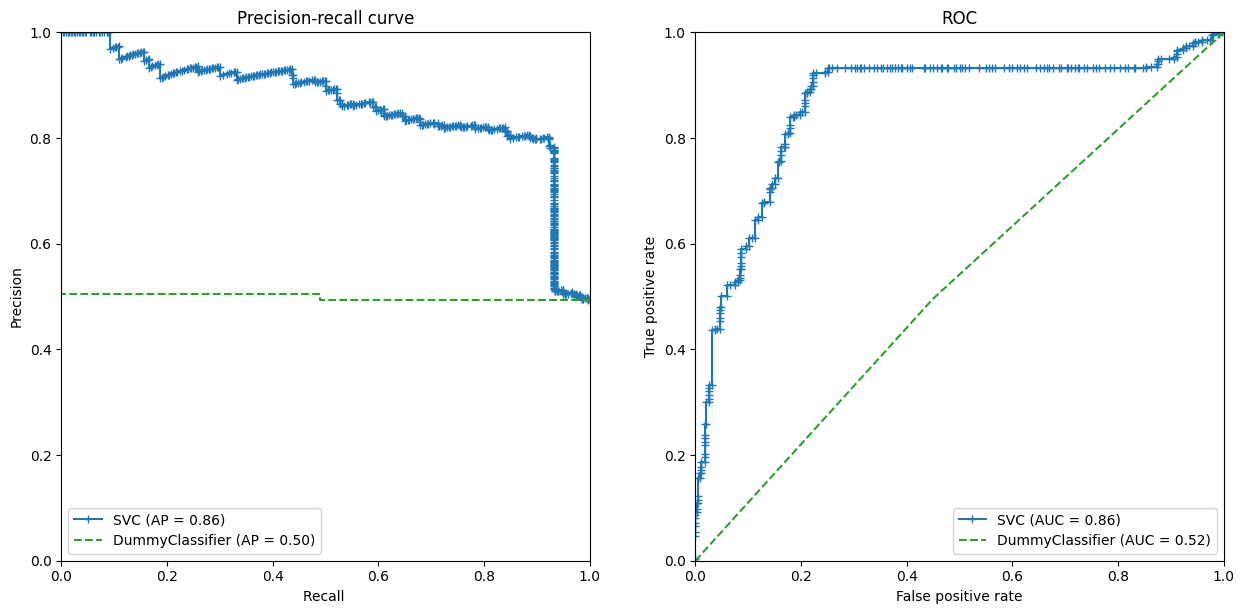

In [44]:
get_the_confusion_matrix_of(model2)
get_the_confusion_matrix_of(model2tuned)
get_the_PRCURVE_and_the_ROC(model2)
get_the_PRCURVE_and_the_ROC(model2tuned)

# **KNN**

In [45]:
k=3
model3=KNeighborsClassifier(n_neighbors=k)
train_the_model(model3)
get_the_score_of_the_model(model3)

the traintime is equal to  0.013985872268676758
the trainerror is equal to  0.08469259723964868
the test error is equal to 0.2134502923976608
the accuracy of the model is equal to  0.7865497076023392
the precision is equal to  0.8281786941580757
the recall is equal to 0.7151335311572701


C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [69]:
import sklearn
import optuna
def objective(trial):
    k = trial.suggest_int('K', 2, 10 ,log=False)
    algorithm=trial.suggest_categorical('algorithm',['auto', 'ball_tree', 'kd_tree', 'brute'])
    p=trial.suggest_int('p',1,2,log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=k)
    classifier_obj.fit(datatrain, targettrain)
    accuracy_score = classifier_obj.score(datatest, targettest)  
    
    return accuracy_score  
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(sampler=sampler,direction='maximize')
study.optimize(objective, n_trials=20)
print("Best trial:", study.best_trial.number)
print("Best accuracy:", study.best_trial.value)
print("Best hyperparameters:", study.best_params)

[I 2024-03-26 14:29:11,086] A new study created in memory with name: no-name-d039115a-c8a3-4b71-acda-5156a5414649
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

[I 2024-03-26 14:29:11,118] Trial 0 finished with value: 0.7266081871345029 and parameters: {'K': 5, 'algorithm': 'auto', 'p': 1}. Best is trial 0 with value: 0.7266081871345029.
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

[I 2024-03-26 14:29:11,142] Trial 1 f

Best trial: 1
Best accuracy: 0.8084795321637427
Best hyperparameters: {'K': 2, 'algorithm': 'auto', 'p': 2}


C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



the traintime is equal to  0.003299236297607422
the trainerror is equal to  0.08657465495608532
the test error is equal to 0.1915204678362573
the accuracy of the model is equal to  0.8084795321637427
the precision is equal to  0.9401709401709402
the recall is equal to 0.6528189910979229


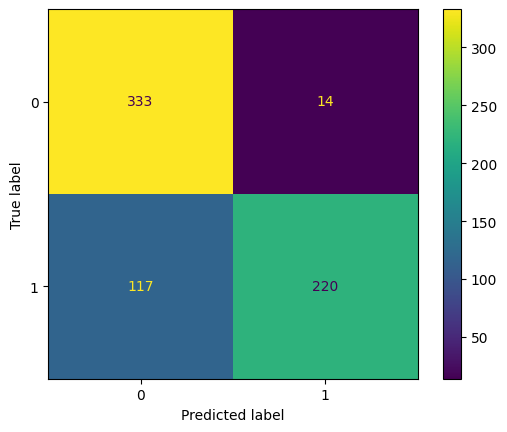

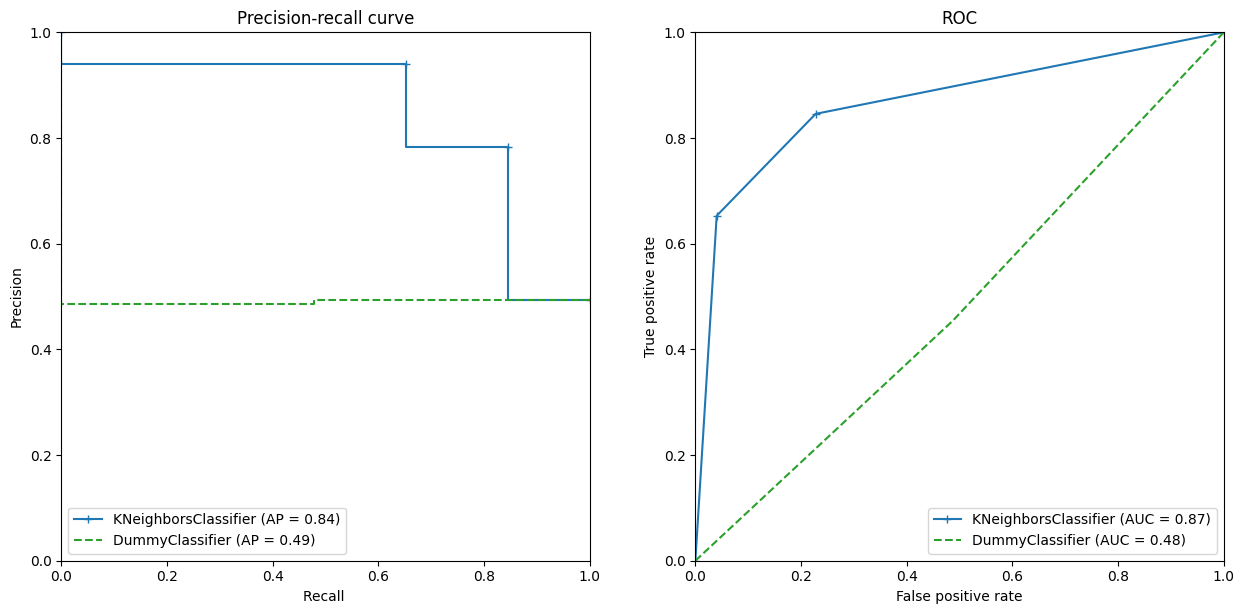

In [74]:
model3tuned=KNeighborsClassifier().set_params(n_neighbors=2,algorithm='auto')
train_the_model(model3tuned)
get_the_score_of_the_model(model3tuned)
get_the_confusion_matrix_of(model3tuned)
get_the_PRCURVE_and_the_ROC(model3tuned)

In [55]:
for p in KNeighborsClassifier().get_params().items():
    print (p)

('algorithm', 'auto')
('leaf_size', 30)
('metric', 'minkowski')
('metric_params', None)
('n_jobs', None)
('n_neighbors', 5)
('p', 2)
('weights', 'uniform')


In [56]:
pip install plotly


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [70]:
import optuna.visualization as vis
param_importance_plot = vis.plot_param_importances(study)
param_importance_plot.show()


In [71]:
contour_plot = vis.plot_contour(study, params=["K","algorithm","p"])
contour_plot.show()

# **Bagged Decision Tree**

In [ ]:
model4

# **XGBClassifier**